In [1]:
import nltk
import pandas as pd
import string
import re
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import os

In [2]:
# Import the data.json
df_data = pd.read_json("/Users/jiaying/Desktop/6506 DSPP/Data Assignment #2/data/classifier/data/data.json")
df_data = df_data[df_data['is_flood'].notna()]

def query_dataframe(df, query):
    return df.query(query)

data_true = query_dataframe(df_data, 'is_flood == True')
data_true


,doc_id,filename,text,is_flood,is_bangladesh,flood_related,flood_climatechange,newspaper,flood_type,dates,...,event_damage-crop_damage_other,event_damage-damage_info_other,event_damage-people_affected,event_damage-peopled_displaced,event_damage-homes_affected,event_damage-disease,event_damage-fatalities,event_dates,event_dates-date,event_dates-prev_date
0,ec583817-3c60-41ee-b856-65f0d9bd7772,dailySun_data_ec583817-3c60-41ee-b856-65f0d9bd...,Date Published:2017-08-31 06:03:11+00:00 tuesd...,True,NaN,NaN,NaN,None,None,[],...,[],[],[],[],[],[],[],[],[],[]
1,f4806621-b874-4f20-97fb-f7c1fa94f6bc,theDailyStar_data_f4806621-b874-4f20-97fb-f7c1...,Date Published:2016-05-05 00:00:00 Flash flood...,True,1.0,1.0,0.0,daily_star,flash,[],...,[],[],[],[],[],[],[],[],[],[]
2,259d503d-f6b1-44b6-a866-8eff03799a07,prothomalo_data_259d503d-f6b1-44b6-a866-8eff03...,Date Published:None Flood situation worsened f...,True,NaN,NaN,NaN,None,None,[],...,[],[],[],[],[],[],[],[],[],[]
5,efc6373e-fce0-40da-9db9-d645a8f3b37f,dailySun_data_efc6373e-fce0-40da-9db9-d645a8f3...,Date Published:2018-08-22 04:03:52+00:00 tuesd...,True,NaN,NaN,NaN,None,None,[],...,[],[],[],[],[],[],[],[],[],[]
9,f3e3bc49-143b-41fb-a0ed-1a1c7e8b86e0,dailySun_data_f3e3bc49-143b-41fb-a0ed-1a1c7e8b...,"Date Published:2019-10-13 00:00:00 tuesday, 21...",True,NaN,NaN,NaN,None,None,[],...,[],[],[],[],[],[],[],[],[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1372,0d5afb7a-dd94-4447-b2ae-d2e5249aa057,theDailyStar_data_0d5afb7a-dd94-4447-b2ae-d2e5...,Date Published:2016-08-12 00:00:00 Photos: Amr...,True,1.0,1.0,0.0,daily_star,monsoon,[2016-07-28],...,[],[],[],[],[],[],[],[],[],[]
1373,c8246240-6042-4bf7-8df0-f93b76054a73,theDailyStar_data_c8246240-6042-4bf7-8df0-f93b...,"Date Published:2017-07-02 00:00:00 Heavy rain,...",True,1.0,1.0,0.0,daily_star,flash,[2017-07-02],...,[],[],[],[],[],[],[],[],[],[]
1374,44c5f5ba-3920-40ec-b804-b5f902c5a7fc,theDailyStar_data_44c5f5ba-3920-40ec-b804-b5f9...,"Date Published:2017-04-19 00:00:00 Ashik Miah,...",True,1.0,1.0,0.0,daily_star,flash,[2017-03-27],...,[],[],[],[],[],[],[],[],[],[]
1376,dcbad4f4-8464-4d15-b952-309fa61172d9,dailySun_data_dcbad4f4-8464-4d15-b952-309fa611...,Date Published:2019-08-12 05:04:05+00:00 tuesd...,True,NaN,NaN,NaN,None,None,[],...,[],[],[],[],[],[],[],[],[],[]


In [3]:
# Import the prediction data
da = pd.read_csv('/Users/jiaying/Desktop/6506 DSPP/Data Assignment #2/data/classifier/data/true_new_data.csv')
da


,datePublished,text,doc_id,connect_filename,newspaper,is_flood
0,2016-09-03 00:00:00,Date Published:2016-09-03 00:00:00 \nIn r...,a333e636-7afc-46a9-a6e7-a49da3ca3d67,NaN,bdnews,True
1,2016-08-29 00:00:00,Date Published:2016-08-29 00:00:00 \nInfo...,9b0133da-fc4d-4735-b44b-ddacb19cf3e6,NaN,bdnews,True
2,2017-07-23 00:00:00,Date Published:2017-07-23 00:00:00 \nThe ...,d8d651c7-7b04-4599-972a-4fc452ba4a9e,NaN,bdnews,True
3,2017-06-18 00:00:00,Date Published:2017-06-18 00:00:00 \nLaxm...,422230e1-c97d-499e-bf84-2f8014ead923,NaN,bdnews,True
4,2017-09-23 00:00:00,Date Published:2017-09-23 00:00:00 \nRoad...,74b887c9-efb2-4d74-a6ef-5eaf24cf679e,NaN,bdnews,True
...,...,...,...,...,...,...
2135,2016-08-02 00:00:00,Date Published:2016-08-02 00:00:00 \nThe ...,61d48782-dcc6-4190-8f98-73b19c771056,NaN,theIndependent,True
2136,2016-08-24 00:00:00,Date Published:2016-08-24 00:00:00 \nIndi...,f533b0df-e589-4e29-8872-74cfd250355f,NaN,theIndependent,True
2137,2016-07-27 00:00:00,Date Published:2016-07-27 00:00:00 \nThe ...,e7f78328-d806-442e-805b-3f92e1f2daab,NaN,theIndependent,True
2138,2019-04-07 10:06:58,Date Published:2019-04-07 10:06:58 \nEros...,b0c65117-21ba-44c4-a06e-edbd3a43900c,NaN,theIndependent,True


In [4]:
# Merge 2 datasets
combined_data = pd.merge(data_true, da, on='doc_id', how='outer', suffixes=('_data_true', '_da'))
combined_data['text'] = combined_data['text_data_true'].combine_first(combined_data['text_da'])
combined_data['is_flood'] = combined_data['is_flood_data_true'].combine_first(combined_data['is_flood_da'])
combined_data.drop(columns=['text_data_true', 'text_da', 'is_flood_data_true', 'is_flood_da'], inplace=True)


In [5]:
# Preprocess the data
custom_stop_words = set(['date', 'published'])
stop_words = set(nltk.corpus.stopwords.words('english'))
punctuations = set(string.punctuation)
all_stop_words = stop_words.union(punctuations, custom_stop_words)
def preprocess(x):
    x = re.sub('[^a-z\s]', ' ', x.lower())
    x = [w for w in x.split() if w not in all_stop_words and len(w)>3]
    return ' '.join(x)

combined_data['org_text'] = combined_data['text']
combined_data['text'] = combined_data['text'].apply(preprocess)


In [6]:
# Extract the date
date_pattern = r'(\d{4}-\d{2}-\d{2})'
combined_data['date_published'] = combined_data['org_text'].str.extract(date_pattern)


In [7]:
# Keep necessary columns
columns_to_drop = [col for col in combined_data.columns if col not in ['doc_id', 'date_published', 'text', 'org_text', 'is_flood']]
combined_data.drop(columns=columns_to_drop, inplace=True)


In [8]:
# Extract year and month into separate columns
combined_data['date_published'] = pd.to_datetime(combined_data['date_published'], errors='coerce')
combined_data['year'] = combined_data['date_published'].dt.year
combined_data['month'] = combined_data['date_published'].dt.month


In [9]:
combined_data


,doc_id,text,is_flood,org_text,date_published,year,month
0,ec583817-3c60-41ee-b856-65f0d9bd7772,tuesday july rise water level erosion madhumat...,True,Date Published:2017-08-31 06:03:11+00:00 tuesd...,2017-08-31,2017.0,8.0
1,f4806621-b874-4f20-97fb-f7c1fa94f6bc,flash floods triggered heavy rain hailstorms d...,True,Date Published:2016-05-05 00:00:00 Flash flood...,2016-05-05,2016.0,5.0
2,259d503d-f6b1-44b6-a866-8eff03799a07,none flood situation worsened tuesday increasi...,True,Date Published:None Flood situation worsened f...,NaT,NaN,NaN
3,efc6373e-fce0-40da-9db9-d645a8f3b37f,tuesday july nearly people died thousands rema...,True,Date Published:2018-08-22 04:03:52+00:00 tuesd...,2018-08-22,2018.0,8.0
4,f3e3bc49-143b-41fb-a0ed-1a1c7e8b86e0,tuesday july residents check homes damaged str...,True,"Date Published:2019-10-13 00:00:00 tuesday, 21...",2019-10-13,2019.0,10.0
...,...,...,...,...,...,...,...
2798,61d48782-dcc6-4190-8f98-73b19c771056,country flood situation swaying extremes flood...,True,Date Published:2016-08-02 00:00:00 \nThe ...,2016-08-02,2016.0,8.0
2799,f533b0df-e589-4e29-8872-74cfd250355f,india decided fully open gates farakka barrage...,True,Date Published:2016-08-24 00:00:00 \nIndi...,2016-08-24,2016.0,8.0
2800,e7f78328-d806-442e-805b-3f92e1f2daab,flood situation northern northeastern regions ...,True,Date Published:2016-07-27 00:00:00 \nThe ...,2016-07-27,2016.0,7.0
2801,b0c65117-21ba-44c4-a06e-edbd3a43900c,erosion caused meghna river taken serious turn...,True,Date Published:2019-04-07 10:06:58 \nEros...,2019-04-07,2019.0,4.0


In [10]:
override=False
if not override and os.path.exists('/Users/jiaying/Desktop/6506 DSPP/Data Assignment #2/data/classifier/timeseries_data/all_data/all_isFlood.json'):
    df_data = pd.read_json('/Users/jiaying/Desktop/6506 DSPP/Data Assignment #2/data/classifier/timeseries_data/all_data/all_isFlood.json')
else:
    df_data = add_prev_true_data(df_data)
    df_data = add_newspapers(df_data)
    df_data = add_datePublished(df_data)
    df_data = add_location(df_data)
    df_data = df_data[df_data['divisions'].apply(lambda x:len(x)>0)]


In [11]:
combined_data

,doc_id,text,is_flood,org_text,date_published,year,month
0,ec583817-3c60-41ee-b856-65f0d9bd7772,tuesday july rise water level erosion madhumat...,True,Date Published:2017-08-31 06:03:11+00:00 tuesd...,2017-08-31,2017.0,8.0
1,f4806621-b874-4f20-97fb-f7c1fa94f6bc,flash floods triggered heavy rain hailstorms d...,True,Date Published:2016-05-05 00:00:00 Flash flood...,2016-05-05,2016.0,5.0
2,259d503d-f6b1-44b6-a866-8eff03799a07,none flood situation worsened tuesday increasi...,True,Date Published:None Flood situation worsened f...,NaT,NaN,NaN
3,efc6373e-fce0-40da-9db9-d645a8f3b37f,tuesday july nearly people died thousands rema...,True,Date Published:2018-08-22 04:03:52+00:00 tuesd...,2018-08-22,2018.0,8.0
4,f3e3bc49-143b-41fb-a0ed-1a1c7e8b86e0,tuesday july residents check homes damaged str...,True,"Date Published:2019-10-13 00:00:00 tuesday, 21...",2019-10-13,2019.0,10.0
...,...,...,...,...,...,...,...
2798,61d48782-dcc6-4190-8f98-73b19c771056,country flood situation swaying extremes flood...,True,Date Published:2016-08-02 00:00:00 \nThe ...,2016-08-02,2016.0,8.0
2799,f533b0df-e589-4e29-8872-74cfd250355f,india decided fully open gates farakka barrage...,True,Date Published:2016-08-24 00:00:00 \nIndi...,2016-08-24,2016.0,8.0
2800,e7f78328-d806-442e-805b-3f92e1f2daab,flood situation northern northeastern regions ...,True,Date Published:2016-07-27 00:00:00 \nThe ...,2016-07-27,2016.0,7.0
2801,b0c65117-21ba-44c4-a06e-edbd3a43900c,erosion caused meghna river taken serious turn...,True,Date Published:2019-04-07 10:06:58 \nEros...,2019-04-07,2019.0,4.0


In [12]:
combined_data.to_csv('combined_dataset.csv', index=False)

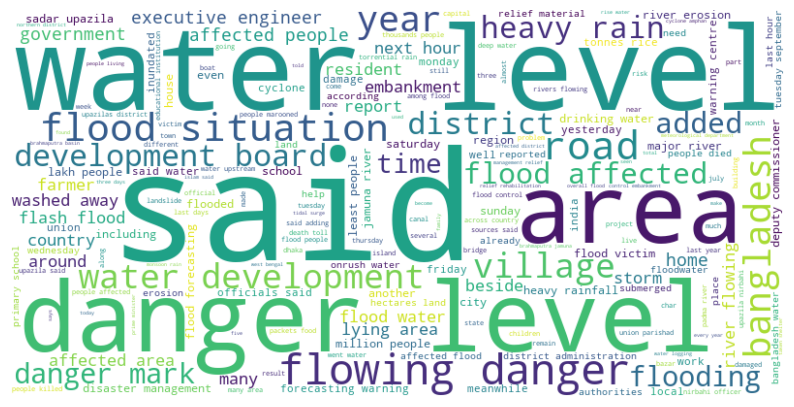

In [13]:
# Concatenate all text from the 'new_text' column
text = ' '.join(combined_data['text'].astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color ='white', colormap='viridis').generate(text)

# Display the generated word cloud using matplotlib
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()